In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
#here we drop the cabin value because it's not necessary
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [8]:
#to check the null values in each columns
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [10]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
train['Embarked'].fillna('S',inplace=True)

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [13]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [14]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [15]:
(177/891)*100

19.865319865319865

In [16]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)
train_age

array([40, 35, 42, 36, 36, 37, 18, 20, 41, 43, 26, 24, 42, 23, 29, 16, 25,
       30, 29, 23, 33, 23, 15, 25, 31, 22, 26, 33, 20, 29, 16, 41, 41, 29,
       21, 20, 22, 21, 24, 16, 21, 35, 22, 24, 33, 18, 32, 30, 24, 35, 38,
       33, 20, 24, 28, 18, 29, 35, 24, 25, 43, 26, 21, 39, 26, 39, 16, 42,
       37, 31, 34, 31, 40, 22, 37, 29, 20, 25, 21, 27, 26, 27, 17, 37, 16,
       21, 28, 21, 26, 28, 31, 18, 37, 36, 22, 17, 43, 34, 15, 39, 33, 18,
       32, 24, 32, 27, 41, 23, 16, 28, 18, 16, 17, 35, 34, 19, 27, 34, 32,
       41, 30, 15, 28, 26, 42, 15, 27, 20, 36, 26, 21, 19, 17, 40, 20, 38,
       15, 29, 38, 23, 29, 40, 37, 26, 33, 22, 38, 15, 38, 21, 29, 23, 15,
       32, 37, 26, 40, 17, 20, 20, 34, 34, 26, 41, 31, 39, 30, 17, 43, 30,
       33, 24, 40, 23, 15, 23, 38])

In [17]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)
test_age

array([35, 22, 42, 38, 17, 25, 42, 24, 23, 16, 25, 38, 37, 37, 34, 23, 20,
       24, 24, 25, 17, 21, 22, 18, 39, 20, 35, 41, 17, 26, 28, 24, 16, 16,
       17, 17, 21, 20, 34, 21, 18, 26, 42, 33, 37, 38, 34, 16, 26, 39, 32,
       30, 18, 30, 34, 18, 28, 30, 39, 22, 23, 17, 37, 33, 36, 24, 20, 34,
       17, 26, 19, 27, 41, 17, 16, 41, 26, 21, 39, 21, 31, 29, 40, 38, 20,
       31])

In [18]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\samee\AppData\Local\Temp\ipykernel_3784\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [19]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\samee\AppData\Local\Temp\ipykernel_3784\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [21]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
#EDA

In [23]:
train[train['Pclass']==3]['Survived'].value_counts()

Survived
0    372
1    119
Name: count, dtype: int64

In [24]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [25]:
119/(372+119)

0.24236252545824846

In [26]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [27]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

In [28]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

C:\Users\samee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


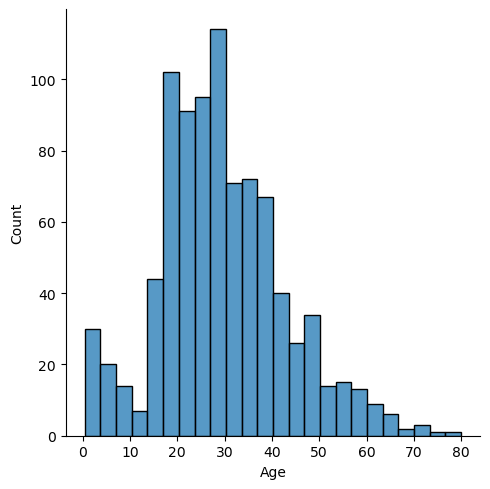

In [29]:
sns.displot(train['Age'])
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

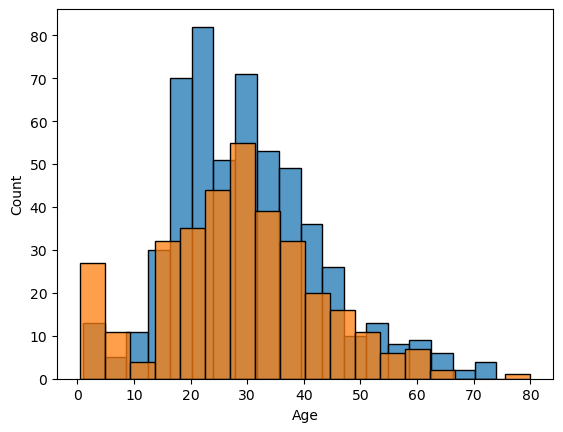

In [30]:

sns.histplot(train['Age'][train['Survived']==0])
sns.histplot(train['Age'][train['Survived']==1])

<Axes: xlabel='Fare', ylabel='Count'>

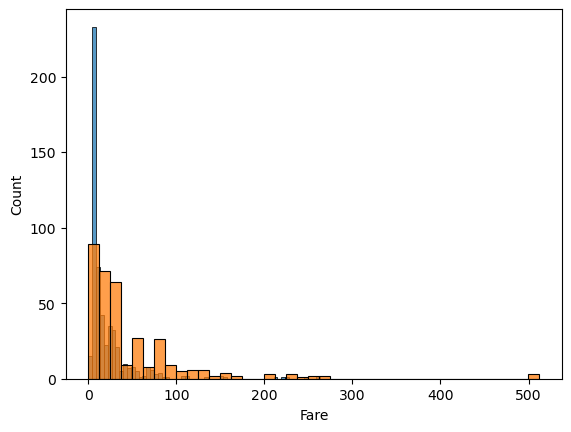

In [31]:
sns.histplot(train['Fare'][train['Survived']==0])
sns.histplot(train['Fare'][train['Survived']==1])

In [32]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [33]:
train.drop(columns=['Ticket'],inplace=True)
test.drop(columns=['Ticket'],inplace=True)

In [34]:
train['family']=train['SibSp'] +train['Parch']+1

In [35]:
test['family']=test['SibSp'] +test['Parch']+1

In [36]:
train['family'].value_counts()

family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [37]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [38]:
def cal(number):
    if number==1:
        return 'Alone'
    elif number>1 and number<5:
        return 'medium'
    else:
        return 'Large'

In [39]:
train['family_size']=train['family'].apply(cal)

In [40]:
test['family_size']=test['family'].apply(cal)

In [41]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)

In [42]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [43]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [44]:
PassengerId=test['PassengerId'].values

In [45]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [46]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [47]:
train

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,medium
1,1,1,female,38.0,71.2833,C,medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,medium
4,0,3,male,35.0,8.0500,S,Alone
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,Alone
887,1,1,female,19.0,30.0000,S,Alone
888,0,3,female,38.0,23.4500,S,medium
889,1,1,male,26.0,30.0000,C,Alone


In [48]:
train.shape

(891, 7)

In [49]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)


In [50]:
train.shape

(891, 10)

In [51]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_medium
0,34.5,7.8292,False,True,True,True,False,False,False
1,47.0,7.0000,False,True,False,False,True,False,True
2,62.0,9.6875,True,False,True,True,False,False,False
3,27.0,8.6625,False,True,True,False,True,False,False
4,22.0,12.2875,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
413,38.0,8.0500,False,True,True,False,True,False,False
414,39.0,108.9000,False,False,False,False,False,False,False
415,38.5,7.2500,False,True,True,False,True,False,False
416,20.0,8.0500,False,True,True,False,True,False,False


In [52]:
test.shape

(418, 9)

In [53]:
train

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_medium
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,True,False,True,False,True,False,False
887,1,19.0,30.0000,False,False,False,False,True,False,False
888,0,38.0,23.4500,False,True,False,False,True,False,True
889,1,26.0,30.0000,False,False,True,False,False,False,False


In [57]:
X=train.iloc[:,1:].values
Y=train.iloc[:,0].values

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [60]:
classifier.fit(X_train,Y_train)

DecisionTreeClassifier()

In [61]:
Y_pred=classifier.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_pred,Y_test)

0.8379888268156425

In [65]:
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_Large,family_size_medium
0,34.5,7.8292,False,True,True,True,False,False,False
1,47.0,7.0000,False,True,False,False,True,False,True
2,62.0,9.6875,True,False,True,True,False,False,False
3,27.0,8.6625,False,True,True,False,True,False,False
4,22.0,12.2875,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...
413,38.0,8.0500,False,True,True,False,True,False,False
414,39.0,108.9000,False,False,False,False,False,False,False
415,38.5,7.2500,False,True,True,False,True,False,False
416,20.0,8.0500,False,True,True,False,True,False,False


In [66]:
Xf=test.iloc[:,:].values

In [68]:
y_final=classifier.predict(Xf)

In [69]:
y_final.shape

(418,)

In [71]:
PassengerId.shape

(418,)

In [72]:
final=pd.DataFrame()

In [73]:
final

""


In [74]:
final['PassengerId']=PassengerId
final['survived']=y_final

In [75]:
final

,PassengerId,survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,1


In [76]:
final.to_csv('submission.csv',index=False)